In [22]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [2]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.info()
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [4]:
# csv파일을 numpy 배열로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [5]:
# 학습데이터셋(학습용 데이터 : train dataset) : 모델 학습시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 테이터 : test dataset) : 모델 평가시 사용
X_test = dataset[700:,:-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [16]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                576       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [18]:
hist = model.fit(X_train, y_train,
                 epochs=300,
#                  batch_size=350
#                  validation_split=0.2 # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 )

Epoch 1/300
22/22 [==============================] - 1s 5ms/step - loss: 1.8375 - binary_accuracy: 0.5586
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 0.9760 - binary_accuracy: 0.6314
Epoch 3/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7035 - binary_accuracy: 0.6700
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6781 - binary_accuracy: 0.6786
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6951 - binary_accuracy: 0.6900
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7417 - binary_accuracy: 0.6529
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 1.0002 - binary_accuracy: 0.6371
Epoch 8/300
22/22 [==============================] - 0s 5ms/step - loss: 0.8518 - binary_accuracy: 0.6371
Epoch 9/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7350 - binary_accuracy: 0.6457
Epoch 10/300
22/22 [==========================

22/22 [==============================] - 0s 4ms/step - loss: 0.4613 - binary_accuracy: 0.7871
Epoch 78/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4677 - binary_accuracy: 0.7771
Epoch 79/300
22/22 [==============================] - 0s 4ms/step - loss: 0.5050 - binary_accuracy: 0.7657
Epoch 80/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4730 - binary_accuracy: 0.7686
Epoch 81/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4579 - binary_accuracy: 0.7729
Epoch 82/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4918 - binary_accuracy: 0.7586
Epoch 83/300
22/22 [==============================] - 0s 4ms/step - loss: 0.5342 - binary_accuracy: 0.7500
Epoch 84/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4697 - binary_accuracy: 0.7857
Epoch 85/300
22/22 [==============================] - 0s 4ms/step - loss: 0.4574 - binary_accuracy: 0.7900
Epoch 86/300
22/22 [==============================

22/22 [==============================] - 0s 4ms/step - loss: 0.3842 - binary_accuracy: 0.8071
Epoch 154/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3803 - binary_accuracy: 0.8243
Epoch 155/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3843 - binary_accuracy: 0.8229
Epoch 156/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3745 - binary_accuracy: 0.8214
Epoch 157/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3685 - binary_accuracy: 0.8271
Epoch 158/300
22/22 [==============================] - 0s 3ms/step - loss: 0.3827 - binary_accuracy: 0.8257
Epoch 159/300
22/22 [==============================] - 0s 5ms/step - loss: 0.4254 - binary_accuracy: 0.7971
Epoch 160/300
22/22 [==============================] - 0s 5ms/step - loss: 0.3923 - binary_accuracy: 0.8000
Epoch 161/300
22/22 [==============================] - 0s 5ms/step - loss: 0.4267 - binary_accuracy: 0.7971
Epoch 162/300
22/22 [=====================

Epoch 229/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3218 - binary_accuracy: 0.8500
Epoch 230/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3279 - binary_accuracy: 0.8443
Epoch 231/300
22/22 [==============================] - 0s 4ms/step - loss: 0.2973 - binary_accuracy: 0.8743
Epoch 232/300
22/22 [==============================] - 0s 4ms/step - loss: 0.2987 - binary_accuracy: 0.8671
Epoch 233/300
22/22 [==============================] - 0s 4ms/step - loss: 0.2999 - binary_accuracy: 0.8729
Epoch 234/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3095 - binary_accuracy: 0.8586
Epoch 235/300
22/22 [==============================] - 0s 4ms/step - loss: 0.2923 - binary_accuracy: 0.8871
Epoch 236/300
22/22 [==============================] - 0s 4ms/step - loss: 0.3176 - binary_accuracy: 0.8557
Epoch 237/300
22/22 [==============================] - 0s 4ms/step - loss: 0.2869 - binary_accuracy: 0.8743
Epoch 238/300
22/22 [=======

## 5. 모델 평가하기(학습과정보기, 평가)

In [19]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

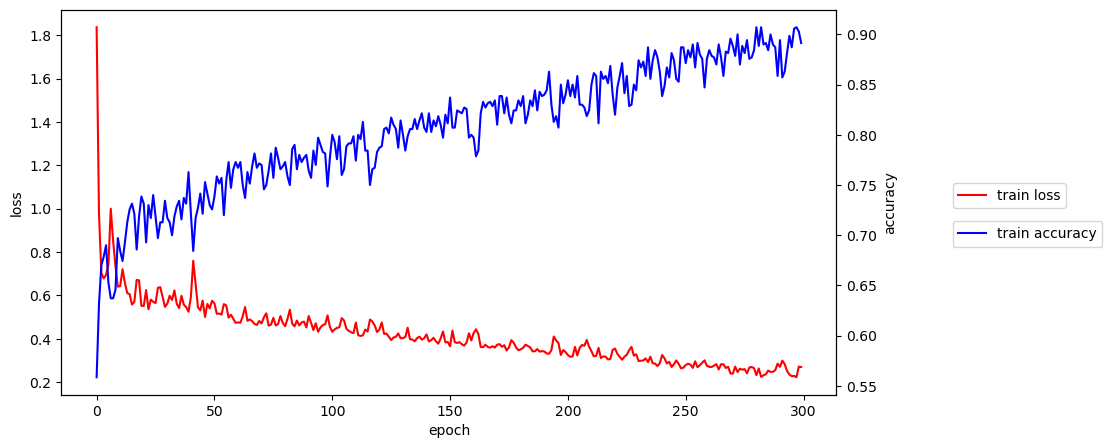

In [31]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.15, .55), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.15, .45), loc=2, borderaxespad=0.)
plt.show()

In [32]:
# 모델 평가(x)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 3ms/step - loss: 0.2419 - binary_accuracy: 0.9000


[0.24193793535232544, 0.8999999761581421]

In [34]:
# 모델 평가(O)
score = model.evaluate(X_test, y_test)
print('loss : {}, 정확도 : {:.2f}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.8674 - binary_accuracy: 0.7647
loss : 0.8673623204231262, 정확도 : 76.47%


## 6. 모델 사용하기

In [35]:
X_train[0], y_train[0]

(array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]),
 1.0)

In [44]:
(model.predict([[6,148,72,35,0,33.6,0.627,50.],
                  [6,148,72,35,0,33.6,0.627,23.]]) > 0.5).astype(int)

1/1 [==============================] - 0s 36ms/step


array([[1],
       [1]])

## 7. 교차표
- 테스트 데이터셋의 실제값과 예측값

In [49]:
y_hat = (model.predict(X_test)>0.5).astype(float)
cnt1=0;cnt2=0;cnt3=0;cnt4=0
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h==1.0 and y==1.0:
        cnt1 += 1
    elif h==0.0 and y==1.0:
        cnt2 += 1
    elif h==1.0 and y==0.0:
        cnt3 += 1
    elif h==0.0 and y==0.0:
        cnt4 += 1
print(cnt1,cnt2)
print(cnt3,cnt4)

3/3 [==============================] - 0s 2ms/step
18 9
7 34


In [54]:
c_tap = pd.crosstab(y_test, y_hat.ravel())
c_tap.index.name = '실제값'
c_tap.columns.name = '예측값'
c_tap

예측값,0.0,1.0
실제값,,
0.0,34,7
1.0,9,18


# 분류분석
```
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델생성 (input 8, target2) : 출력층에서의 활성화 함수 softmax
3. 학습과정 설정 (loss = 'categorical_crossentropy', metrics=['accuracy']) : 
4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
5. 모델 학습평가 : 그래프(hist.history.keys()를 확인후 4가지)
             평가(X_test, Y_test)
             교차표(pd.crosstab 이용)
 6. 모델 사용하기 - 예측
```

In [55]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [111]:
# 1. 데이터셋 생성 및 전처리
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [112]:
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
Y_train.reshape(-1,2)
Y_val.reshape(-1,2)
Y_test.reshape(-1,2)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [113]:
# 2. 모델생성
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=64, input_dim=2, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                576       
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 2)                 34        
                                                                 
Total params: 3,218
Trainable params: 3,218
Non-trainable params: 0
_________________________________________________________________


In [114]:
# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
# 4. 모델 학습
hist = model.fit(X_train, Y_train,
                validation_data=[X_val, Y_val],
                epochs=200)

Epoch 1/200
19/19 [==============================] - 0s 14ms/step - loss: 1.2611 - accuracy: 0.5917 - val_loss: 0.9276 - val_accuracy: 0.5400
Epoch 2/200
19/19 [==============================] - 0s 6ms/step - loss: 0.9513 - accuracy: 0.6033 - val_loss: 0.8594 - val_accuracy: 0.5800
Epoch 3/200
19/19 [==============================] - 0s 6ms/step - loss: 1.0292 - accuracy: 0.6283 - val_loss: 0.8568 - val_accuracy: 0.6200
Epoch 4/200
19/19 [==============================] - 0s 6ms/step - loss: 0.7995 - accuracy: 0.6500 - val_loss: 0.7205 - val_accuracy: 0.6800
Epoch 5/200
19/19 [==============================] - 0s 6ms/step - loss: 0.7167 - accuracy: 0.6733 - val_loss: 0.7482 - val_accuracy: 0.5400
Epoch 6/200
19/19 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.6733 - val_loss: 0.7428 - val_accuracy: 0.6800
Epoch 7/200
19/19 [==============================] - 0s 6ms/step - loss: 0.7191 - accuracy: 0.6650 - val_loss: 0.7239 - val_accuracy: 0.6000
Epoch 8/200


Epoch 59/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7700 - val_loss: 0.5670 - val_accuracy: 0.6900
Epoch 60/200
19/19 [==============================] - 0s 6ms/step - loss: 0.4944 - accuracy: 0.7617 - val_loss: 0.5782 - val_accuracy: 0.7000
Epoch 61/200
19/19 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.7567 - val_loss: 0.5779 - val_accuracy: 0.7100
Epoch 62/200
19/19 [==============================] - 0s 6ms/step - loss: 0.4890 - accuracy: 0.7467 - val_loss: 0.6720 - val_accuracy: 0.6300
Epoch 63/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.7317 - val_loss: 0.7156 - val_accuracy: 0.7200
Epoch 64/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.7417 - val_loss: 0.7317 - val_accuracy: 0.6000
Epoch 65/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7867 - val_loss: 0.6488 - val_accuracy: 0.6700
Epoch 

19/19 [==============================] - 0s 5ms/step - loss: 0.4588 - accuracy: 0.7683 - val_loss: 0.6177 - val_accuracy: 0.6700
Epoch 117/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.7950 - val_loss: 0.6117 - val_accuracy: 0.7100
Epoch 118/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 0.7800 - val_loss: 0.5715 - val_accuracy: 0.7300
Epoch 119/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.7683 - val_loss: 0.5902 - val_accuracy: 0.7700
Epoch 120/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4744 - accuracy: 0.7683 - val_loss: 0.5555 - val_accuracy: 0.7100
Epoch 121/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7833 - val_loss: 0.5734 - val_accuracy: 0.6900
Epoch 122/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4443 - accuracy: 0.8017 - val_loss: 0.6384 - val_accuracy: 0.7400
Epoch 123/200

19/19 [==============================] - 0s 6ms/step - loss: 0.4214 - accuracy: 0.7950 - val_loss: 0.6127 - val_accuracy: 0.6700
Epoch 174/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8100 - val_loss: 0.6018 - val_accuracy: 0.7000
Epoch 175/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3902 - accuracy: 0.8150 - val_loss: 0.5972 - val_accuracy: 0.7400
Epoch 176/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3759 - accuracy: 0.8283 - val_loss: 0.5839 - val_accuracy: 0.7100
Epoch 177/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.8317 - val_loss: 0.6217 - val_accuracy: 0.6700
Epoch 178/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4269 - accuracy: 0.8083 - val_loss: 0.5917 - val_accuracy: 0.7200
Epoch 179/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3951 - accuracy: 0.8167 - val_loss: 0.5690 - val_accuracy: 0.7400
Epoch 180/200

In [117]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

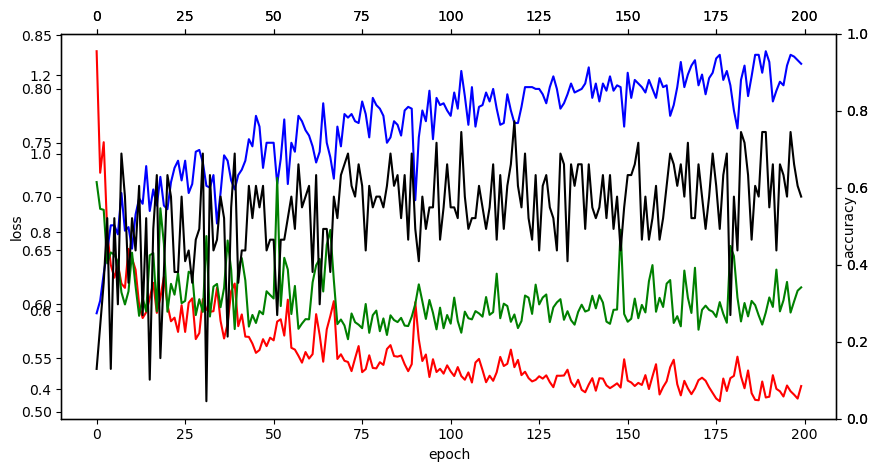

In [123]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
val_loss_ax = loss_ax.twinx()
val_loss_ax = loss_ax.twiny()
val_acc_ax = acc_ax.twinx()
val_acc_ax = acc_ax.twiny()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
val_loss_ax.plot(hist.history['val_loss'], 'g')
val_acc_ax.plot(hist.history['val_accuracy'], 'k')
plt.show()

In [125]:
score = model.evaluate(X_test, Y_test)
print('loss : {}, 정확도 : {:.2f}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.7920 - accuracy: 0.6176
loss : 0.7920390367507935, 정확도 : 61.76%


In [132]:
test_arr = model.predict([X_test])
[arr.argmax() for arr in test_arr]

3/3 [==============================] - 0s 2ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [134]:
pd.crosstab(y_test, [arr.argmax() for arr in test_arr])

col_0,0,1
row_0,,
0.0,34,7
1.0,19,8
